In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import math

In [2]:
#generate random data
data_dimension = 2
no_of_points = 100

# Use a reed to reproduce randomized numbers
np.random.seed(0)
data_set_random = np.random.random((no_of_points, data_dimension))

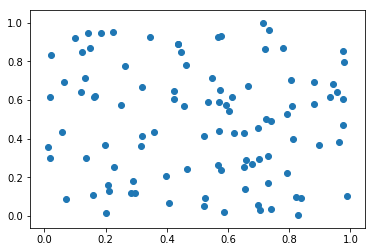

In [3]:
X = data_set_random
plt.scatter(X[:, 0], X[:, 1])

In [4]:
n_samples = 100
random_state = 17

In [29]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

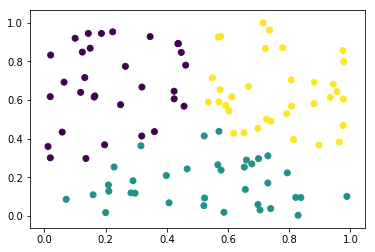

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [7]:
X_blob, y_blob = make_blobs(n_samples=n_samples, random_state=random_state, center_box=(0,1),cluster_std = 0.05,centers=4)

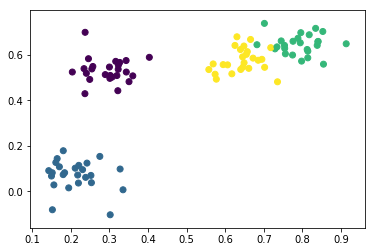

In [8]:
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

In [9]:
X_con=np.concatenate((X,X_blob),axis = 0)

In [27]:
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_con)

(-0.2, 1.2)

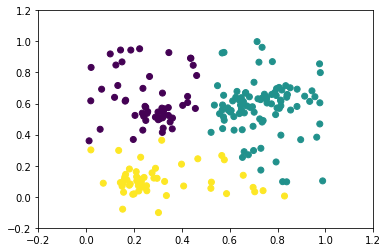

In [28]:
plt.scatter(X_con[:, 0], X_con[:, 1], c=y_pred)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

In [126]:
k_value = 3
np.random.seed(1)
cluster_points = np.random.random((k_value, data_dimension))

In [13]:

cluster_points

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02]])

(-0.2, 1.2)

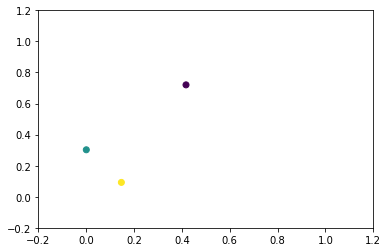

In [14]:
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=range(0,k_value))
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

In [15]:
def distance(a, b):
    dist = np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

    return(dist)    

In [16]:
def min_dist_pos(X ,cluster_points):
    
    position = []
    smallest = []
    
    for x in X:
        distances = []
        for i in range(0,k_value):
            distances.append(distance(x,cluster_points[i]))
        mn = np.min(distances)
        pos = np.argmin(distances)
        smallest.append(mn)
        position.append(pos)
    return np.array(position),np.array(smallest)

In [17]:
a = np.zeros((3,2))

In [18]:
a[0]

array([0., 0.])

In [19]:
pos ,small =  min_dist_pos(X ,cluster_points)

In [20]:
pos

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int64)

In [21]:
coord = 2
[np.mean(X[pos==coord,0]),np.mean(X[pos==coord,1])]

[0.4929882155260576, 0.12898349749768195]

In [22]:
def update_cluster_points(X, pos, cluster_points):
    
    k = len(cluster_points)
    new_points = np.zeros((k,2))
    for i in range(0,k):
        new_points[i] = [np.mean(X[pos==i,0]),np.mean(X[pos==i,1])]

    return new_points

    
    

In [23]:
update_cluster_points(X, pos, cluster_points)

array([[0.56188826, 0.63921514],
       [0.07329711, 0.39676875],
       [0.49298822, 0.1289835 ]])

In [67]:
# Test the routine
# Init cluster points
k_value = 3
np.random.seed(1)
cluster_points = np.random.random((k_value, data_dimension))

convergence = 2
max_iterations = 25

In [68]:
pos = np.zeros(len(X))
steps = 0
for j in range(0,max_iterations): 
    steps += 1
    pos_temp = pos
    pos ,small =  min_dist_pos(X ,cluster_points)
    
    conv_criterion = np.sum(pos_temp!=pos)
    new_points = update_cluster_points(X, pos, cluster_points)
    cluster_points = new_points
    if conv_criterion <= convergence:
        print("Convergence reached in {} steps".format(steps))
        break
    if j== max_iterations-1:
        print("Convergence could not be reached in {} steps".format(max_iterations))
        print("{} points still alternating".format(conv_criterion))
    
    
    

Convergence reached in 9 steps


In [38]:
pos

array([0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2,
       0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1], dtype=int64)

In [40]:
np.sum(pos==2
      )

31

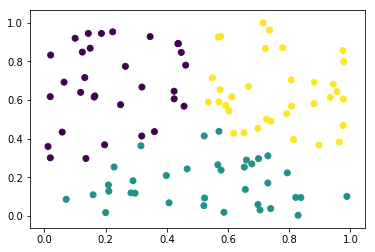

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

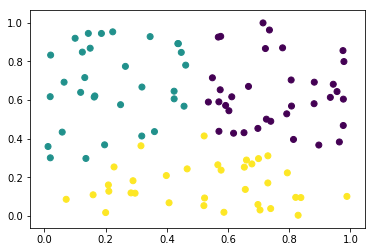

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=pos)

In [122]:
class K_means_simple(object):
    
    def __init__(self, n_clusters=3, random_state=0, convergence=0, max_iter=50):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.convergence = convergence
        self.max_iterations = max_iterations
        
    def distance(self,a, b):
        dist = np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

        return dist  
    
    def min_dist_pos(self, X ,cluster_points):
    
        position = []
        smallest = []

        for x in X:
            distances = []
            for i in range(0,k_value):
                distances.append(self.distance(x,cluster_points[i]))
            mn = np.min(distances)
            pos = np.argmin(distances)
            #smallest.append(mn)
            position.append(pos)
        return np.array(position) #,np.array(smallest)
        
    def update_cluster_points(self, X, pos, cluster_points):
    
        k = len(cluster_points)
        new_points = np.zeros((k,2))
        for i in range(0,k):
            new_points[i] = [np.mean(X[pos==i,0]),np.mean(X[pos==i,1])]

        return new_points
    
    
    def fit_predict(self, X, y=None):
        
        print("Calling the fit method with {} clusters".format(K_means_simple().n_clusters))

In [138]:
pos = np.zeros(len(X),dtype='int64')
K_means_simple().update_cluster_points( X, pos, cluster_points)

array([[0.51396978, 0.48690581],
       [       nan,        nan],
       [       nan,        nan]])

In [139]:
cluster_points

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02]])

In [124]:
pos

array([0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2,
       0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1], dtype=int64)

In [137]:
pos = np.zeros(len(X),dtype='int64')

In [135]:
pos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])